<a href="https://colab.research.google.com/github/9bishal/Learning-Tensorflow/blob/main/neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction to the Regression with Neural Networks in TensorFlow
There are many definations for a regression problem but in pur cases, we're going to simplfy it: predicting a numerical variables based on some other cobination of variable, even shorter.....predicting a number

In [82]:
import tensorflow as tf
print(tf.__version__)

2.18.0


##Creating some data to view and fit

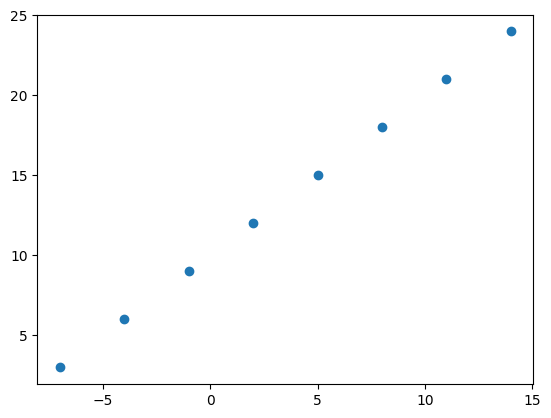

In [83]:
import numpy as np
import matplotlib.pyplot as plt
#creating features
x=np.array([-7.0,-4.0,-1.0,2.0,5.0, 8.0, 11.0, 14.0])
#creating labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
#visulaize it
plt.scatter(x,y)


In [84]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and Output Shapes

In [85]:
# create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([9397000])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([9397000], dtype=int32)>)

In [86]:
input_shape=x.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [87]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [88]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

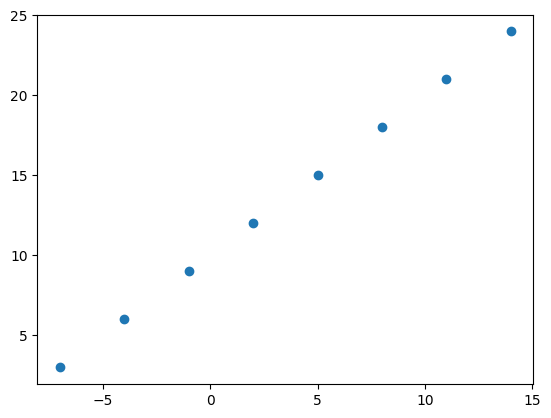

In [89]:
plt.scatter(x,y)

In [90]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

##Steps in Modeling TensorFlow
1.**Creating a Model**: define the input & ouput layers, as well as the hidden layres of a deep learning model.

2.**Compiling a model**: define the loss function(in other words, the function which tells our model how wrong it is)and the optimizer( tells our model how to improve the patterns its learning) and evaluation metrics
(What we can use to interpret the performance of our model).

3.**Fitting a model**: letting the model try to find patterns between x & y(features and labels)

In [91]:
#set ramdom seed
tf.random.set_seed(42)

#1.Create  a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step - loss: 12.1018 - mae: 12.1018
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.9693 - mae: 11.9693
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.8368 - mae: 11.8368
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.7043 - mae: 11.7043
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 11.5718 - mae: 11.5718


In [92]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[9.81619]], dtype=float32)

##Improving Model
We can inprove the model by altering the steps we took to create a mode.

1.**Creating a mode**: here we might add more layres, increaes the number of hidden unite(all called neurons) within each of the hidden layers, change the activation function of each layer

2.**Compiling a model**:Here we might change the optimizatioin function or perhaps the learning rate of optimization functon.

3**Fitting**: here we might fit the model for more epochs(leave it training for longer) or on more data(given the model more examples to learn from)

###Using SSD()

In [93]:
#let us build a model to improve

#1.Create a Model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2.Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3.Fit a model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.8864 - mae: 13.8864
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 13.5584 - mae: 13.5584
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 13.2407 - mae: 13.2407
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 12.9361 - mae: 12.9361
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.6307 - mae: 12.6307
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 12.3066 - mae: 12.3066
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 11.9675 - mae: 11.9675
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 11.5893 - mae: 11.5893
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 11.1667 - mae: 11.1667
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 10.6597 - mae: 10.6597
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.0501 - mae: 10.0501
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 9.2861 - mae: 9.2861
Epoch 13/100
1/1 ━━━━━━━━━━━

In [103]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred, y_pred+10


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


(array([[21.617603]], dtype=float32), array([[31.617603]], dtype=float32))

###Using Adam(Adam(learning_rate=0.0001)

In [114]:
#let us build a model to improve

#1.Create a Model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2.Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])
#3.Fit a model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 13.5078 - mae: 13.5078
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 13.4817 - mae: 13.4817
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 13.4568 - mae: 13.4568
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 13.4326 - mae: 13.4326
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 13.4084 - mae: 13.4084
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 13.3854 - mae: 13.3854
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 13.3637 - mae: 13.3637
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 13.3433 - mae: 13.3433
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 13.3228 - mae: 13.3228
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.3019 - mae: 13.3019
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.2807 - mae: 13.2807
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 13.2597 - mae: 13.2597
Epoch 13/100
1/1 ━━━━━━━

In [115]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


array([[20.55494]], dtype=float32)

In [99]:
y_pred+10

array([[31.617603]], dtype=float32)

In [98]:
x.numpy(),y.numpy()

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

###Let's see if we can make another to improve our model

In [106]:
#1. Create tthe model(this time eith an extra hidden layers with 100 hidden units)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


#3.Fit a model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step - loss: 13.9645 - mae: 13.9645
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 13.5677 - mae: 13.5677
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 13.1799 - mae: 13.1799
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 12.8006 - mae: 12.8006
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 12.4193 - mae: 12.4193
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 12.0312 - mae: 12.0312
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 11.6289 - mae: 11.6289
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 11.2190 - mae: 11.2190
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 10.7927 - mae: 10.7927
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 10.3445 - mae: 10.3445
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 9.8712 - mae: 9.8712
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 9.3680 - mae: 9.3680
Epoch 13/100
1/1 ━━━━━━━━━━

In [108]:
x.numpy(),y.numpy()

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

In [111]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[31.607042]], dtype=float32)